# Creacion y prueba de la implementacion del algoritmo de descenso de gradiente

Se debe probara el algoritmo usando un dataset de 3 columnas y 1000 filas para las cuales se aplicara regresion sobre una de las variables generando una funcion de regresion de la forma $f(x) = w_1 x_1 + w_2 x_2 + w_0$.

In [20]:
import pandas as pd
import numpy as np
from Prediction_model import Prediction_model
from sklearn.model_selection import train_test_split

In [21]:
training_df = pd.DataFrame(columns=['var_a', 'var_b', 'var_c'])

n_values = 1000
#Coeficientes que deberia predecir el modelo como vector de pesos
training_df['var_a'] = np.random.rand(n_values)
training_df['var_b'] = np.random.rand(n_values)
training_df['var_c'] = np.random.rand(n_values)
training_df

,var_a,var_b,var_c
0,0.911637,0.422084,0.207701
1,0.977464,0.093480,0.160702
2,0.943409,0.738744,0.362846
3,0.266463,0.584862,0.680964
4,0.097852,0.758825,0.145428
...,...,...,...
995,0.114979,0.721529,0.009264
996,0.108995,0.212342,0.725665
997,0.812406,0.170233,0.985324
998,0.366536,0.713080,0.609513


Number of iterations: 80000


<Figure size 640x1000 with 0 Axes>

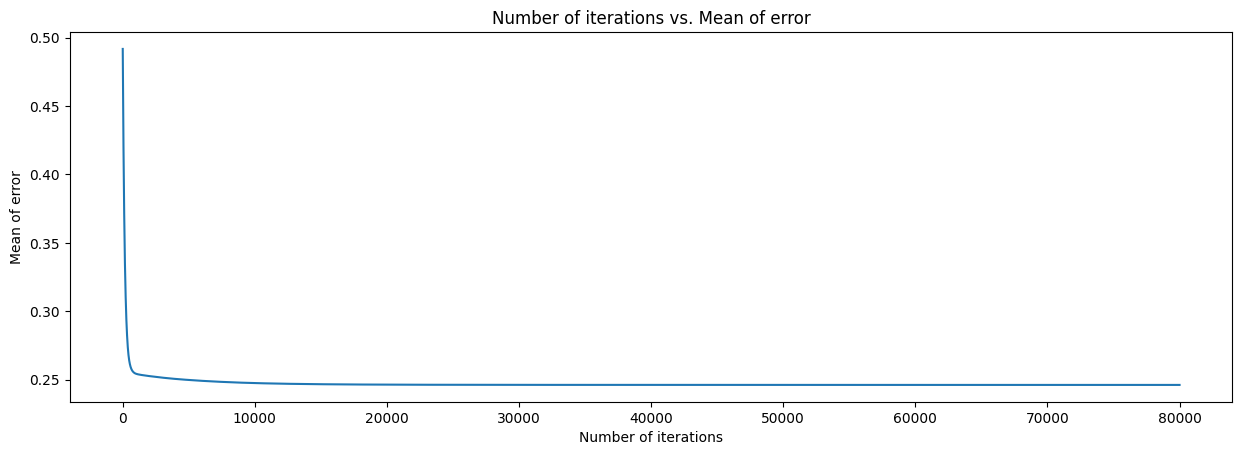

In [22]:
test = Prediction_model(training_set = training_df, 
                        dep_var='var_c', 
                        ind_vars=['var_a', 'var_b'])
test.train_model(max_iter=80000)

In [28]:
df_not_null_norm = pd.read_csv('datasets/CarDekho_not_null_normalize.csv')
makers = list(df_not_null_norm['Make'].unique())
fuel_types = list(df_not_null_norm['Fuel Type'].unique())
owners = list(df_not_null_norm['Owner'].unique())
max_iter = 100000

Number of iterations: 100000


<Figure size 640x1000 with 0 Axes>

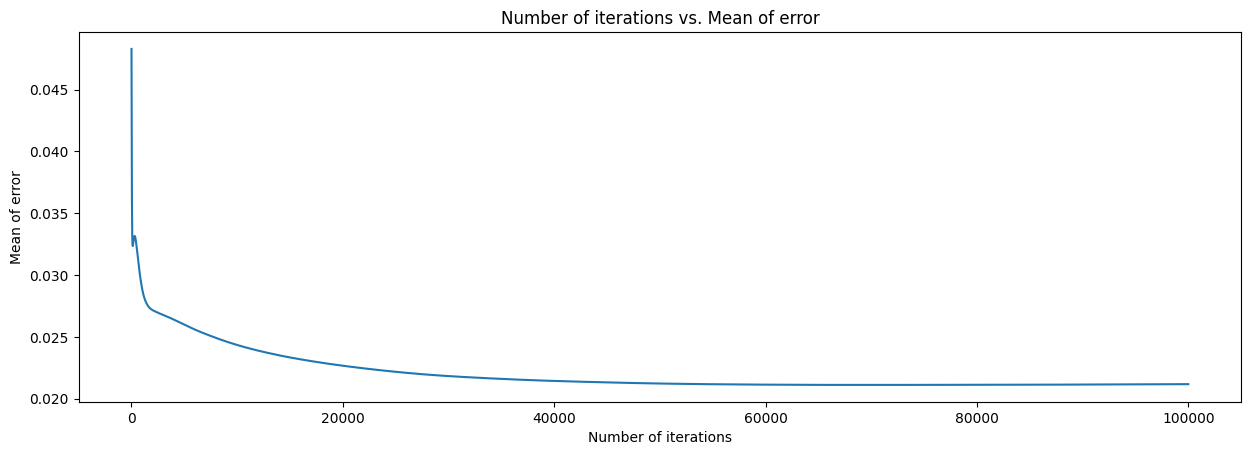

Resumen de error del modelo:
	Valor máximo del error: 0.37208201640998834
	Valor mínimo del error: -0.12850156489693204
	Media del error: -0.0015102391373622037
	Mediana del error: -0.004138388294588034
	Suma total del error: -0.5663396765108264


In [29]:
## usando las variables de ejemplo dadas con el dataset normalizado sin nulos
df_not_null_cat_norm = pd.read_csv('datasets/CarDekho_not_null_cat_norm.csv')
dep_var = 'Price'
ind_vars = ['Year', 'Kilometer', 'Fuel Tank Capacity', 'Seating Capacity','Manual', 'Automatic'] + fuel_types + owners + makers
x_train, x_test, y_train, y_test = train_test_split(df_not_null_cat_norm[ind_vars], df_not_null_cat_norm[dep_var], test_size=0.2, random_state=0)

train_set = pd.DataFrame()
train_set[dep_var] = y_train
train_set[ind_vars] = x_train

model_not_null = Prediction_model(training_set=train_set,
                                  dep_var=dep_var,
                                  ind_vars=ind_vars)

model_not_null.train_model(max_iter=max_iter)

test_set = pd.DataFrame()
test_set[dep_var] = y_test
test_set[ind_vars] = x_test
model_not_null.test_model(test_set=test_set)

Number of iterations: 100000


<Figure size 640x1000 with 0 Axes>

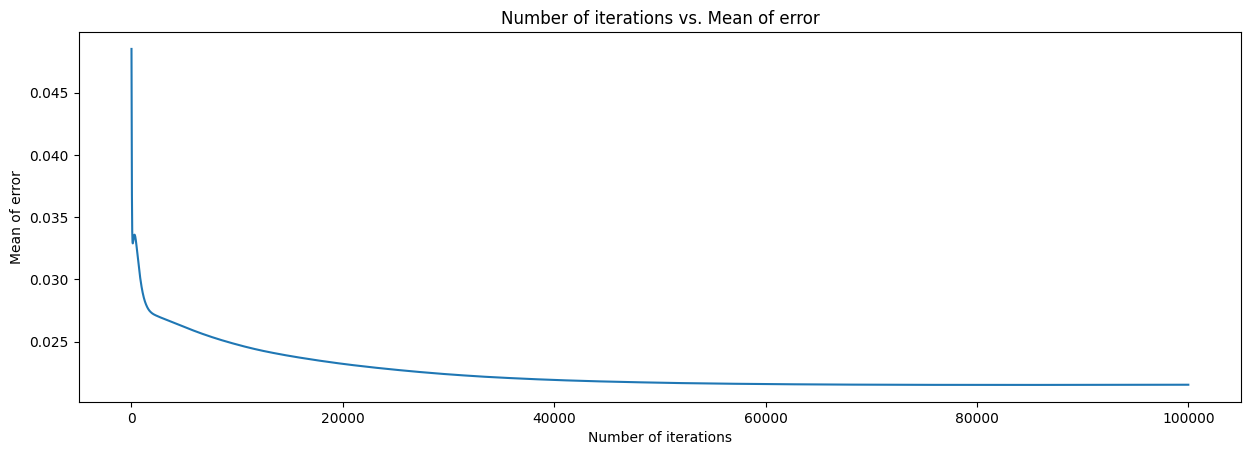

Resumen de error del modelo:
	Valor máximo del error: 0.8470182846938936
	Valor mínimo del error: -0.10506997301173064
	Media del error: -0.0019756896616202257
	Mediana del error: -0.0036401130752773195
	Suma total del error: -0.813984140587533


In [30]:
## usando las variables de ejemplo dadas con el dataset normalizado rellenando nulos
df_fill_cat_norm = pd.read_csv('datasets/CarDekho_fill_cat_norm.csv')
dep_var = 'Price'
ind_vars = ['Year', 'Kilometer', 'Fuel Tank Capacity', 'Seating Capacity','Manual', 'Automatic'] + fuel_types + owners + makers
x_train, x_test, y_train, y_test = train_test_split(df_fill_cat_norm[ind_vars], df_fill_cat_norm[dep_var], test_size=0.2, random_state=0)

train_set = pd.DataFrame()
train_set[dep_var] = y_train
train_set[ind_vars] = x_train

model_not_null = Prediction_model(training_set=train_set,
                                  dep_var=dep_var,
                                  ind_vars=ind_vars)

model_not_null.train_model(max_iter=max_iter)

test_set = pd.DataFrame()
test_set[dep_var] = y_test
test_set[ind_vars] = x_test
model_not_null.test_model(test_set=test_set)

Number of iterations: 100000


<Figure size 640x1000 with 0 Axes>

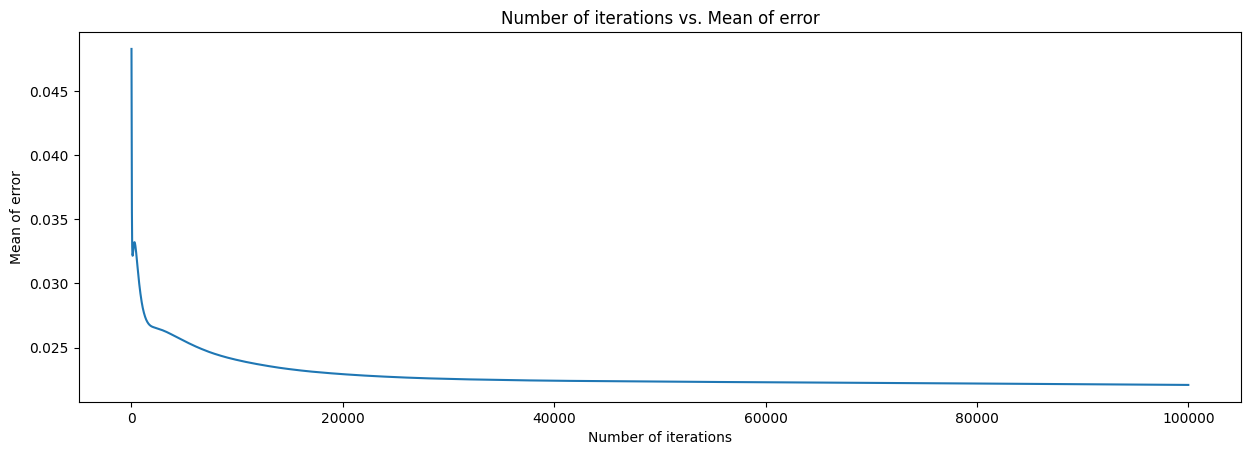

Resumen de error del modelo:
	Valor máximo del error: 0.37035065118014787
	Valor mínimo del error: -0.10500967838981339
	Media del error: -0.0015427705022875676
	Mediana del error: -0.003891598961917292
	Suma total del error: -0.5785389383578379


In [31]:
## usando las variables de ejemplo + las dimensiones del carro con el dataset normalizado sin nulos
df_not_null_cat_norm = pd.read_csv('datasets/CarDekho_not_null_cat_norm.csv')
dep_var = 'Price'
ind_vars = ['Year', 'Kilometer', 'Fuel Tank Capacity', 'Seating Capacity','Manual', 'Automatic', 'Height', 'Width'] + fuel_types + owners + makers
x_train, x_test, y_train, y_test = train_test_split(df_not_null_cat_norm[ind_vars], df_not_null_cat_norm[dep_var], test_size=0.2, random_state=0)

train_set = pd.DataFrame()
train_set[dep_var] = y_train
train_set[ind_vars] = x_train

model_not_null = Prediction_model(training_set=train_set,
                                  dep_var=dep_var,
                                  ind_vars=ind_vars)

model_not_null.train_model(max_iter=max_iter)

test_set = pd.DataFrame()
test_set[dep_var] = y_test
test_set[ind_vars] = x_test
model_not_null.test_model(test_set=test_set)

Number of iterations: 100000


<Figure size 640x1000 with 0 Axes>

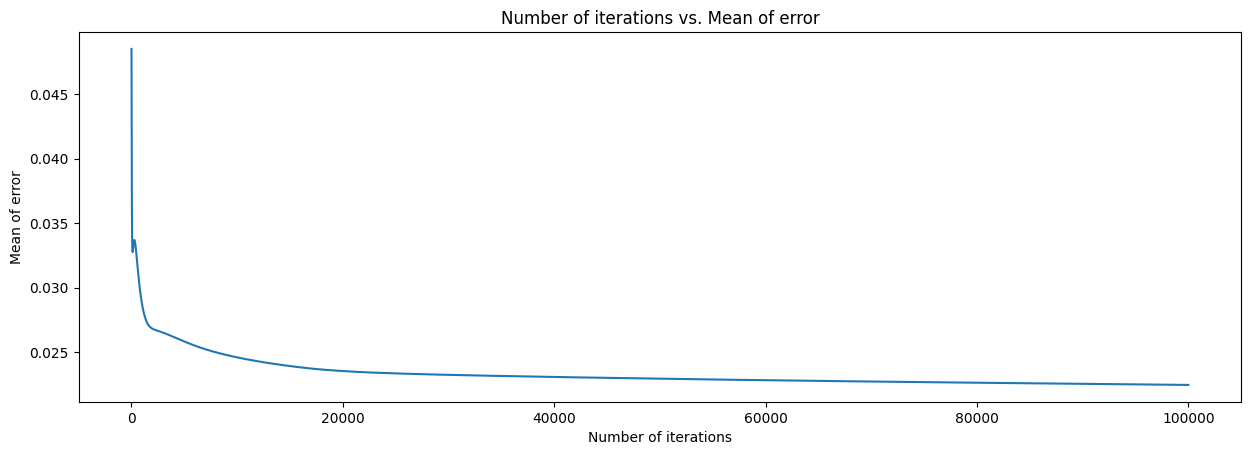

Resumen de error del modelo:
	Valor máximo del error: 0.8464341236555355
	Valor mínimo del error: -0.09231092915671427
	Media del error: -0.0024169377897925366
	Mediana del error: -0.004142558162513798
	Suma total del error: -0.9957783693945251


In [32]:
## usando las variables de ejemplo dadas con el dataset normalizado rellenando nulos
df_fill_cat_norm = pd.read_csv('datasets/CarDekho_fill_cat_norm.csv')
dep_var = 'Price'
ind_vars = ['Year', 'Kilometer', 'Fuel Tank Capacity', 'Seating Capacity','Manual', 'Automatic', 'Height', 'Width'] + fuel_types + owners + makers
x_train, x_test, y_train, y_test = train_test_split(df_fill_cat_norm[ind_vars], df_fill_cat_norm[dep_var], test_size=0.2, random_state=0)

train_set = pd.DataFrame()
train_set[dep_var] = y_train
train_set[ind_vars] = x_train

model_not_null = Prediction_model(training_set=train_set,
                                  dep_var=dep_var,
                                  ind_vars=ind_vars)

model_not_null.train_model(max_iter=max_iter)

test_set = pd.DataFrame()
test_set[dep_var] = y_test
test_set[ind_vars] = x_test
model_not_null.test_model(test_set=test_set)